Things to do: sentiment analysis of most recent 100 tweets of various news orgs

Initialize lots of empty lists

(build a function?)

* For one news org:
* Pull 100 last tweets (or pull 1 at a time, 100 times?)
** See 1-Solved-StuGetRelief for looping through 100
* Run each through Vader
* Collect: text, date, compound, pos, neg, neut; add to respective lists
* Average compounds for each news org; add to compound average list
* Clear lists


DF of lists

PLOT 1
* Actually 5 plots
* ?? How to number Tweets Ago? Need a column for this? Or use Pandas index?)*
* Plot compounds


PLOT 2
* Zip News org keys with compound average list into dict
* Create DF

* Build data frame of lists


Export to CSV, Save plots as PNG


In [35]:
# Import Dependencies

import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Account
target_user = "@CNN"

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:

        # Print Tweets
        print(f'Tweet {counter}: {tweet["text"]}')

        # Add to Counter
        counter = counter + 1

In [42]:
# Target User Accounts
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYT")

# Variable for holding sentiments
sentiments = []

#Variables for holding average Vader compound scores

# Loop through all target users
for target in target_users:

    # Variable for holding the oldest tweet
    #oldest_tweet = None
    counter = 0
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
        
            # Add sentiments for each tweet into an array
            sentiments.append({"Tweet": tweet["text"],
                               "News Org": target,
                               "Tweets Ago": counter,
                            "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg})
            
            # Add to counter 
            counter = counter + 1
        
        x+=1

Tweet 0: The frozen bodies of 15 men are discovered on an abandoned bus in the countryside. Witnesses: A Frozen Death. 9pm o… https://t.co/4mmpj5sEuy
Tweet 1: 50 years since his murder, celebrate the wit, work and world of groundbreaking sixties playwright Joe Orton. Joe Or… https://t.co/t8jfLuTCwo
Tweet 2: Re-rewind! 🎤 🙌 Who else wants to watch @CraigDavid guest host #SLFN all over again? https://t.co/KQYcB5wY7D Via… https://t.co/A0ZMWPzZbq
Tweet 3: The London mum using her maternity leave to travel the world &amp; giving a tropical twist to the Power Maternity Leave… https://t.co/XVvadZd70I
Tweet 4: Claw blimey! 🦀 Here's why thousands of spider crabs gather together. #BluePlanet2 Via @BBCEarth https://t.co/nVkHpFsgxe
Tweet 5: RT @BBCMOTD: Chaos at Norwich...

A 'local bloke' from the crowd has come to the rescue. #bbcfootball https://t.co/nzUsoPXhzt
Tweet 6: The @WorldPressPhoto's Noortje Gorter discusses what makes a world-beating image. 📸🐼 https://t.co/nwRCtV15Qh https://t.co/F6kRF

Tweet 60: RT @bbcmusic: 😍 @AnneMarieIAm has a special message for you ❤️
#SLFN tonight at 7.30pm on @BBCOne https://t.co/gQqBymQLgI
Tweet 61: RT @BBCWorld: Egypt mosque attack latest:
- At least 184 killed
- 125 wounded
- Friday prayers 'targeted' 
https://t.co/YuTLpUjkr7
Tweet 62: RT @BBCNews: #BlackFriday, 🇬🇧 style https://t.co/96UWnNgzqi https://t.co/L5vqYvgQEi
Tweet 63: What is @CraigDavid up to?! 😂 Find out on #SLFN Tonight at 7:30pm on @BBCOne. Via @BBCMusic https://t.co/zqehC1HRPX
Tweet 64: The woman who can't forget: this is how it feels to be able to remember every day of your life. 💭… https://t.co/taAwMhtwYj
Tweet 65: This app is designed to help women speak up in meetings. Via @BBC100Women. https://t.co/BSwVAIYYvu
Tweet 66: She loves @Rihanna, she tries to not listen to her own music &amp; she used to want to be a radio DJ.❤️️ 🎶 10 facts abo… https://t.co/GWAxjAiTwn
Tweet 67: Driverless cars are already being tested as an alternative to F1. 🏁🚙 Via @TWBBC. https://t.co/ne2lhV

Tweet 20: Celebrate with a classic holiday special tonight! Watch The Story of Santa Claus at 9/8c on CBS &amp; CBS All Access:… https://t.co/JKHhuGQz19
Tweet 21: Tonight, watch two holiday specials w/ Robbie the Reindeer: Hooves of Fire starting @ 8/7c on CBS &amp; CBS All Access:… https://t.co/YT3norBieN
Tweet 22: Only 3 more days until the Angels take flight in Shanghai! Watch the #VSFashionShow Tues, Nov. 28 @ 10/9c on CBS &amp;… https://t.co/OK12P30i8k
Tweet 23: Come along as Victoria's Secret top execs share an exclusive inside look behind the 2017 #VSFashionShow! Tune in Tu… https://t.co/jae1jA5jXL
Tweet 24: In 4 days, let Bruno Mars light up your night with Bruno Mars: 24K Magic Live at the Apollo, Wednesday at 10/9c on… https://t.co/mQoZppXcDH
Tweet 25: Don't miss Angel Lais Ribeiro hit the runway in the 2017 Champagne Nights Fantasy Bra! Watch the #VSFashionShow Tue… https://t.co/qK9ZGXQsWA
Tweet 26: Relive all the incredible music memories from 'GRAMMYs® Greatest Stories: A 

Tweet 80: RT @YoungSheldon: Liven up your group chat with special-edition #YoungSheldon Shelmojis inspired by TV’s #1 new show! Download now: https:/…
Tweet 81: RT @startrekcbs: The war with the Klingons comes to a head on the fall finale of #StarTrekDiscovery, streaming this Sunday, Nov. 12. https:…
Tweet 82: RT @NoActivityCBS: He's focused &amp; ambitious...with nothing to do. Meet Detective Cullen. #NoActivity premieres Sunday: https://t.co/wV2EEUj…
Tweet 83: RT @swatcbs: Immerse yourself in a scene from tonight's S.W.A.T. with this 360-degree experience: https://t.co/xn8DLzzeLh https://t.co/Dnq6…
Tweet 84: Don't miss the new special 'The Dick Van Dyke Show- Now In Living Color!' airing Dec. 22 on CBS:… https://t.co/Mhmi51G1r6
Tweet 85: RT @MomCBS: Bonnie's brother Ray is back! Tune in to #Mom tonight at 9/8c or stream it live with CBS All Access: https://t.co/ttRQOQVSec ht…
Tweet 86: RT @startrekcbs: Stream the fall finale this Sunday, Nov. 12. #StarTrekDiscovery continues January 

Tweet 40: "Saying that we are sorry today is not enough," Canadian Prime Minister Justin Trudeau said to survivors of forced… https://t.co/93vUEe8iJ2
Tweet 41: Portraits of Queen Elizabeth II and her husband, the Duke of Edinburgh Prince Philip, have been released to celebra… https://t.co/3rYCmNNzpi
Tweet 42: Tesla unveiled its new semi-truck and an all-new version of its Roadster sports car https://t.co/FYzssDqyHb https://t.co/1SV0QW1awR
Tweet 43: A new NASA tool can tell you which glacier may flood your city as the planet warms https://t.co/zoGLd2m8EZ https://t.co/VKJObGabn0
Tweet 44: The degenerative brain disease CTE has been confirmed in a living NFL player for the first time… https://t.co/umPYIBsET1
Tweet 45: This is why Wall Street and Republicans hate the Consumer Financial Protection Bureau https://t.co/zPGipbGx7C https://t.co/uQiriyvPvO
Tweet 46: President Trump could be on track to triple former President Obama's time on the golf course in his first year in o… https://t.co/0

Tweet 0: Actor Rance Howard, father of Ron Howard, dies at 89 https://t.co/pptOBuQQ9Y
Tweet 1: Francisco Hernandez on immigration: "If we can get Americans to take those jobs and pay at least a living wage then… https://t.co/fuQau4o9Fx
Tweet 2: .@CortesSteve on building a border wall: "Very often Hispanics are the victims of stupid liberal policies like sanc… https://t.co/5cyFDdBvJj
Tweet 3: .@CortesSteve on border wall: "The idea that we can't secure our border or that we're incapable of building a wall,… https://t.co/oCvNqlT01x
Tweet 4: .@jessebwatters catches up with President @realDonaldTrump's youngest fan to discuss immigration, taxes and North K… https://t.co/ZH6UZX24x6
Tweet 5: Jacob Silva shares with @jessebwatters which TV hosts he'd put on Mount Rushmore, including @JudgeJeanine, @edhenry… https://t.co/QEhWVxSUVI
Tweet 6: Jacob Silva on @POTUS' Asia trip: "He's making good relationships with countries overseas, and that's good because… https://t.co/kZucYN4z6Z
Tweet 7: Jacob 

Tweet 80: Democrats' 'DREAMer' demands threaten spending bill, gov shutdown in coming weeks https://t.co/2E8e1crsG0
Tweet 81: Allan Smith: "If the wall is not funded and [@POTUS] strikes a DACA deal, it's going to get a huge backlash from hi… https://t.co/CW5s7nxFPo
Tweet 82: Earlier, President @realDonaldTrump marked #SmallBusinessSaturday, and encouraged Americans to support local busine… https://t.co/0sjGqDg1ly
Tweet 83: On @ffweekend, @dbongino doubled down on his description of @HillaryClinton as the "most deceptive human being."… https://t.co/cV7t8HVd0m
Tweet 84: Unemployment rate prediction for end of 2019 - per @GoldmanSachs economists. https://t.co/5poCXCqbBu https://t.co/0HrBGeBpTy
Tweet 85: Washington Post reporter @JanellRoss caught plotting liberal agenda with billionaire George Soros… https://t.co/EVmaZDiUXX
Tweet 86: .@SebGorka: "Just as we defeated fascism, just as we defeated communism, we have to shut down the attractiveness of… https://t.co/MEnHKBOrYL
Tweet 87: Greec

Tweet 60: Detroit: The Most Exciting City in America?. https://t.co/A32nOVFMyN
Tweet 61: Affordable Care Act Repeal Is Back on the Agenda, Republicans Say. https://t.co/2t4qZ3kmsO
Tweet 62: 2018 Dilemma for Republicans: Which Way Now on Obamacare?. https://t.co/3OdNgrH90F
Tweet 63: In Health Bill’s Defeat, Medicaid Comes of Age. https://t.co/gCtZ357Fxy
Tweet 64: Hooray for Fiona the Hippo, Our Bundle of Social-Media Joy. https://t.co/MOirrzrt7h
Tweet 65: Scene Stealers: Welcome to the Campiest Place on Earth. https://t.co/kaexKT8Vhr
Tweet 66: Check In: In Busy Rome, a Hotel That’s an Oasis. https://t.co/Z2YCN3E5iw
Tweet 67: Kith’s Ronnie Fieg Knows Exactly What You Want. https://t.co/gEmEN3rfuh
Tweet 68: Modern Love: Love to Love Ya Baby. https://t.co/kF9O3UklWR
Tweet 69: The Look: You Look Like a Morrissey Fan. https://t.co/KVTdOZuNhy
Tweet 70: Oxford Circus Station in London Reopens After Panicked Evacuation. https://t.co/scebdJdPrc
Tweet 71: India’s Gay Rights Activists Seize Moment

In [37]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

# Configure dataframe column order and display
sentiments_pd = sentiments_pd[['News Org',
                        'Tweets Ago',
                         'Date',
                         'Tweet',
                         'Compound',
                         'Positive',
                         'Neutral',
                         'Negative']]

sentiments_pd

,News Org,Tweets Ago,Date,Tweet,Compound,Positive,Neutral,Negative
0,@BBC,0,Sat Nov 25 20:35:04 +0000 2017,The frozen bodies of 15 men are discovered on ...,-0.7845,0.000,0.266,0.734
1,@BBC,1,Sat Nov 25 19:53:03 +0000 2017,"50 years since his murder, celebrate the wit, ...",-0.2500,0.140,0.178,0.682
2,@BBC,2,Sat Nov 25 19:33:02 +0000 2017,Re-rewind! 🎤 🙌 Who else wants to watch @CraigD...,0.0000,0.000,0.000,1.000
3,@BBC,3,Sat Nov 25 18:30:06 +0000 2017,The London mum using her maternity leave to tr...,0.2960,0.106,0.053,0.841
4,@BBC,4,Sat Nov 25 18:14:06 +0000 2017,Claw blimey! 🦀 Here's why thousands of spider ...,0.0000,0.000,0.000,1.000
5,@BBC,5,Sat Nov 25 17:30:42 +0000 2017,RT @BBCMOTD: Chaos at Norwich...\n\nA 'local b...,-0.1027,0.150,0.168,0.682
6,@BBC,6,Sat Nov 25 17:30:08 +0000 2017,The @WorldPressPhoto's Noortje Gorter discusse...,0.0000,0.000,0.000,1.000
7,@BBC,7,Sat Nov 25 17:25:18 +0000 2017,RT @bbcstrictly: It's #Strictly Saturday! We a...,0.0000,0.000,0.000,1.000
8,@BBC,8,Sat Nov 25 17:24:41 +0000 2017,RT @BBCR1: Here's 14 of the best Live Lounge p...,0.7964,0.283,0.000,0.717
9,@BBC,9,Sat Nov 25 17:24:30 +0000 2017,RT @BBCiPlayer: **** GEO block to local people...,-0.4404,0.000,0.225,0.775


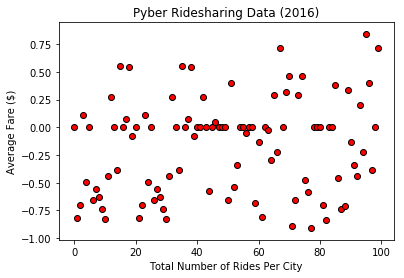

In [38]:
# Create overlaid scatterplots news organizations' compound scores
# bbc = , cbs = teal, cnn = tomato or orangered, fox = blue, nyt = gold
,
cnn = plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Compound"],
                  facecolors='red', edgecolors='black', label="CNN")

# cnn = plt.scatter(merged_df.groupby(['type']).get_group('Urban')["Ride Count"], 
#             merged_df.groupby(['type']).get_group('Urban')["Average Fare"], 
#             facecolors='coral', edgecolors="black", s= merged_df["driver_count"], alpha=0.75, label="Urban")

# Set textual properties
plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

# Configure legend with City Types and add note to chart

# plt.legend(loc="upper right")
# plt.legend(handles=[urban, suburban, rural], loc="best", title="City Types")
# figtext(.95, .6, "Note:\nCircle size correlates with driver count per city.", rotation='horizontal')

plt.show()

In [39]:
average_compound = sentiments_pd.groupby("News Org").mean()["Compound"]

compounds_df = pd.DataFrame({"Average Compound Score": average_compound})
compounds_df

,Average Compound Score
News Org,
@BBC,0.044964
@CBS,0.286606
@CNN,-0.161769
@FoxNews,-0.003859
@NYT,-0.101990
